In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
from string import digits
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
from tqdm import tqdm
tqdm.pandas()

In [2]:
df=pd.read_pickle('Data_df.pkl')

In [3]:
df.head()

,tID,uID,time,lat,lon,friends,followers,verified,favourites,text
0,1189244830200799233,1970190668,2019-10-29 18:17:17+00:00,41.080877,-81.516751,2573,1155,False,32964,@ColinCowherd you are a dick. Better hope this...
1,1189244830360199171,430477302,2019-10-29 18:17:17+00:00,37.269176,-119.306608,683,708,False,35098,What’s the mayors name in nightmare before Chr...
2,1189244830301523971,1141756827983466497,2019-10-29 18:17:17+00:00,37.980826,-121.300425,79,156,False,2288,@_JMZF It will there’s no hoping
3,1189244830486089729,357705745,2019-10-29 18:17:17+00:00,40.780709,-73.968542,623,777,False,9781,Ya really some crackheads
4,1189244830502797313,727631597357273088,2019-10-29 18:17:17+00:00,32.774585,-115.548036,223,195,False,1888,Ooo girlll you’re glowinggg🤩✨✨


In [4]:
def word_checker(texts):
    check=''
    words=[word.lower() for word in texts.split()]
    if 'lyft' in words:
        check=check+'lyft'
    if 'uber' in words:
        check=check+'uber'
    if 'taxi' in words:
        check=check+'taxi'
    if check=='':
        check=''+'other'
    return check


def remove_url(txt):
    if str(txt)=='nan':
        return ' '
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


def text_cleaner(texts):
    texts=texts.replace('#','')
    texts=texts.replace('@','')
    #texts=' '.join(word for word in texts.split(' ') if not word.startswith('@'))
    texts=texts.translate(remove_digits)
    texts_wt_url=remove_url(texts)
    #print(texts_wt_url)
    #wt_url_ws=word_tokenize(texts_wt_url)
    word_split=word_tokenize(texts_wt_url)
    #word_split=[word.lower() for word in word_split if len(word.split("\\"))<2 and word.lower() not in bad_words and word in wt_url_ws]
    filtered_word1=[w.lower() for w in word_split if not w in punct]
    filtered_word2=[w for w in filtered_word1 if not w in stop_words_english]
    filtered_sent=" ".join(filtered_word2)
    return filtered_sent

In [5]:
punct=set(string.punctuation)
stop_words_english = set(stopwords.words('english'))
stop_words_spanish=set(stopwords.words('spanish'))
remove_digits = str.maketrans('', '', digits)
bad_words=["''","n't","'s","'ve","rt","b'rt","'rt"]

In [6]:
#df1=df[(df['time']>pd.to_datetime("2019-10-31",utc=True)) & (df['time']<pd.to_datetime("2019-11-2",utc=True))]
df1=df
df1['cln_txt']=df1.progress_apply(lambda x: text_cleaner(x['text']), axis=1)
df1['word_check']=df1.progress_apply(lambda x: word_checker(x['cln_txt']),axis=1)

100%|█████████████████████████████████████████████████████████████████████| 5017079/5017079 [07:38<00:00, 10936.07it/s]


In [9]:
print(len(df1))
d=df1['word_check'].value_counts()

5017079


In [123]:
df1.to_pickle('processed_DI_data.pkl')

In [124]:
del df

In [21]:
list(di.values())

[5013089, 2811, 630, 345, 169, 22, 11, 2]

In [25]:
data_df=pd.DataFrame()
data_df['name']=list(di.keys())[1:]
data_df['value']=list(di.values())[1:]
data_df

,name,value
0,uber,2811
1,lyft,630
2,taxi,345
3,lyftuber,169
4,ubertaxi,22
5,lyftubertaxi,11
6,lyfttaxi,2


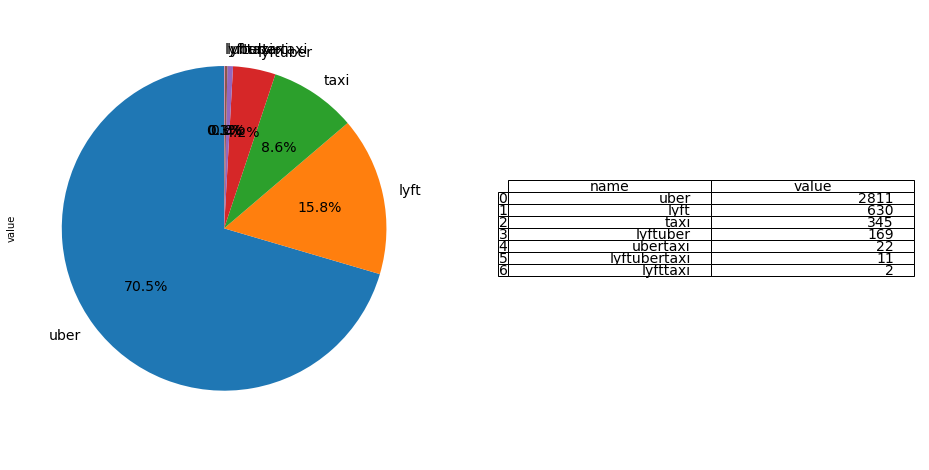

In [28]:
from pandas.plotting import table
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
data_df.plot(kind='pie', y = 'value', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=data_df['name'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, data_df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [35]:
df_lyft= df1[df1['word_check']=='lyft']
df_lyft['count']=[1 for i in range(len(df_lyft))]
df_lyft['cum_count']=df_lyft['count'].cumsum()
df_lyft['senti_score']=df_lyft.progress_apply(lambda x: analyzer.polarity_scores(x['cln_txt'])['compound'],axis=1)
df_lyft['cum_senti_score']=df_lyft['senti_score'].cumsum()
#df_lyft.head()

C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████████████████████████████████████████████████████████████████████████| 630/630 [00:00<00:00, 3323.95it/s]
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCo

In [36]:
df_uber= df1[df1['word_check']=='uber']
df_uber['count']=[1 for i in range(len(df_uber))]
df_uber['cum_count']=df_uber['count'].cumsum()
df_uber['senti_score']=df_uber.progress_apply(lambda x: analyzer.polarity_scores(x['cln_txt'])['compound'],axis=1)
df_uber['cum_senti_score']=df_uber['senti_score'].cumsum()
df_uber.head()

C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|████████████████████████████████████████████████████████████████████████████| 2811/2811 [00:00<00:00, 3357.47it/s]
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCo

,tID,uID,time,lat,lon,friends,followers,verified,favourites,text,cln_txt,word_check,count,cum_count,senti_score,cum_senti_score
610,1189244952657743874,75743427,2019-10-29 18:17:46+00:00,39.284713,-76.620482,181,474,False,3918,Reason #135 why we need improved transportati...,reason need improved transportation baltimore ...,uber,1,1,0.4767,0.4767
1630,1189245175060750336,219101705,2019-10-29 18:18:39+00:00,45.557830,-73.723025,274,4549,False,28768,fin argus in the uber next to me at the red li...,fin argus uber next red light marty,uber,1,2,0.0000,0.4767
5312,1189245943020957701,839124510934765568,2019-10-29 18:21:42+00:00,19.328383,-99.152340,76,7,False,1243,@PacoZeaCom Mejor pónganse a trabajar y dejen ...,pacozeacom mejor pnganse trabajar dejen de cob...,uber,1,3,0.0000,0.4767
5676,1189246013846032384,2996111636,2019-10-29 18:21:59+00:00,35.445550,-84.606919,841,639,False,11074,@_taylascruggs_ your uber is ready,taylascruggs uber ready,uber,1,4,0.4201,0.8968
7953,1189246473529106432,561462963,2019-10-29 18:23:49+00:00,42.313670,-71.088712,372,339,False,5972,Like good thing I spent $10 on an Uber to get ...,like good thing spent uber get time,uber,1,5,0.6597,1.5565


In [43]:
df_taxi= df1[df1['word_check']=='taxi']
df_taxi['count']=[1 for i in range(len(df_taxi))]
df_taxi['cum_count']=df_taxi['count'].cumsum()
df_taxi['senti_score']=df_taxi.progress_apply(lambda x: analyzer.polarity_scores(x['cln_txt'])['compound'],axis=1)
df_taxi['cum_senti_score']=df_taxi['senti_score'].cumsum()
df_taxi.head()

C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████████████████████████████████████████████████████████████████████████| 345/345 [00:00<00:00, 3185.13it/s]
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCo

,tID,uID,time,lat,lon,friends,followers,verified,favourites,text,cln_txt,word_check,count,cum_count,senti_score,cum_senti_score
19054,1189248761589125120,37109437,2019-10-29 18:32:54+00:00,33.899313,-118.165419,166,349,False,5416,So if I don’t leave my house by 6:30am I’ll be...,dont leave house ill late work taxi leave gues...,taxi,1,1,0.3875,0.3875
29862,1189251027381424128,178178878,2019-10-29 18:41:54+00:00,30.342904,-81.415740,890,1631,False,45257,Any version of Big Yellow Taxi or Amie by the ...,version big yellow taxi amie pure praire leagu...,taxi,1,2,-0.6249,-0.2374
30023,1189251061716000768,220735356,2019-10-29 18:42:02+00:00,41.298394,-72.929158,4995,1394,False,74,@LizHabib @flyLAXairport Airports suck up to t...,lizhabib flylaxairport airports suck taxi unio...,taxi,1,3,-0.1265,-0.3639
45382,1189254213026668551,1374941850,2019-10-29 18:54:34+00:00,50.236327,-119.329570,150,103,False,25330,"Should have taken an Uber....oh, the taxi indu...",taken uberoh taxi industry shuttled,taxi,1,4,0.0000,-0.3639
150517,1189276443316051974,40489033,2019-10-29 20:22:54+00:00,40.426741,-74.171711,781,250,False,7732,TAXI SONO QUI TAXI SONO QUI TAXI SONO QUI,taxi sono qui taxi sono qui taxi sono qui,taxi,1,5,0.0000,-0.3639


In [46]:
df_lyftuber= df1[df1['word_check']=='lyftuber']
df_lyftuber['count']=[1 for i in range(len(df_lyftuber))]
df_lyftuber['cum_count']=df_lyftuber['count'].cumsum()
df_lyftuber['senti_score']=df_lyftuber.progress_apply(lambda x: analyzer.polarity_scores(x['cln_txt'])['compound'],axis=1)
df_lyftuber['cum_senti_score']=df_lyftuber['senti_score'].cumsum()
df_uber.head()

C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 2855.46it/s]
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCo

,tID,uID,time,lat,lon,friends,followers,verified,favourites,text,cln_txt,word_check,count,cum_count,senti_score,cum_senti_score
610,1189244952657743874,75743427,2019-10-29 18:17:46+00:00,39.284713,-76.620482,181,474,False,3918,Reason #135 why we need improved transportati...,reason need improved transportation baltimore ...,uber,1,1,0.4767,0.4767
1630,1189245175060750336,219101705,2019-10-29 18:18:39+00:00,45.557830,-73.723025,274,4549,False,28768,fin argus in the uber next to me at the red li...,fin argus uber next red light marty,uber,1,2,0.0000,0.4767
5312,1189245943020957701,839124510934765568,2019-10-29 18:21:42+00:00,19.328383,-99.152340,76,7,False,1243,@PacoZeaCom Mejor pónganse a trabajar y dejen ...,pacozeacom mejor pnganse trabajar dejen de cob...,uber,1,3,0.0000,0.4767
5676,1189246013846032384,2996111636,2019-10-29 18:21:59+00:00,35.445550,-84.606919,841,639,False,11074,@_taylascruggs_ your uber is ready,taylascruggs uber ready,uber,1,4,0.4201,0.8968
7953,1189246473529106432,561462963,2019-10-29 18:23:49+00:00,42.313670,-71.088712,372,339,False,5972,Like good thing I spent $10 on an Uber to get ...,like good thing spent uber get time,uber,1,5,0.6597,1.5565


# Temporal Sentiment visualization

C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\matplotlib\patches.py:75: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties.
  warnings.warn("Setting the 'color' property will override"
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\matplotlib\patches.py:75: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties.
  warnings.warn("Setting the 'color' property will override"


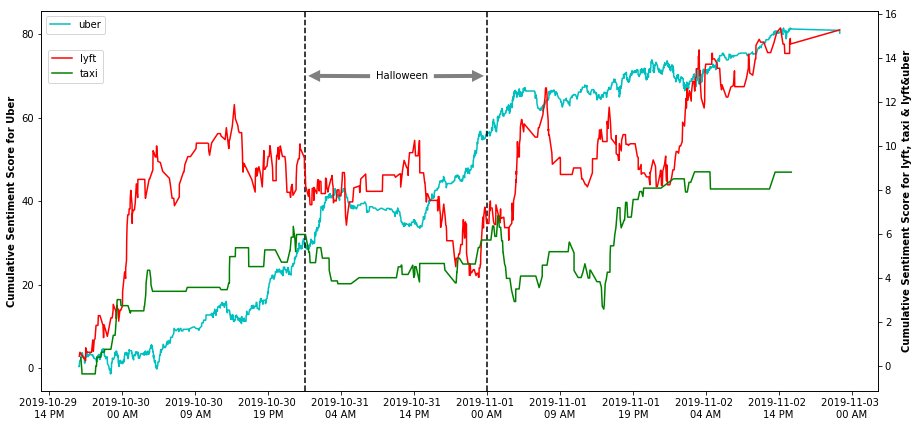

In [420]:
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

fig,ax=plt.subplots(figsize=(15,7))
ax2=ax.twinx()
ax.plot(df_uber['time'],df_uber['cum_senti_score'],color='c',label='uber')
ax2.plot(df_lyft['time'],df_lyft['cum_senti_score'],color='red',label='lyft')
ax2.plot(df_taxi['time'],df_taxi['cum_senti_score'],color='green',label='taxi')
#ax2.plot(df_lyftuber['time'],df_lyftuber['cum_senti_score'],color='blue',label='lyft & uber')
#ax.plot(df['time'],df['cum_rideshare'],label='rideshare')
#ax.plot(df['time'],df['cum_taxi'],label='taxi')
ax.set_ylabel('Cumulative Sentiment Score for Uber', weight='bold')
ax.axvline(x=datetime(2019,10,31),color='k',ls='--')
ax.axvline(x=datetime(2019,11,1),color='k',ls='--')
ax.annotate('Halloween',(datetime(2019,10,31),70),
             xytext=(0.4, 0.82), textcoords='axes fraction',
             arrowprops = dict(facecolor='grey',color='grey',lw=10**(-1000000000000000),shrink=.05))
ax.annotate(' ',(datetime(2019,11,1),70),
             xytext=(0.46, 0.82), textcoords='axes fraction',
             arrowprops = dict(facecolor='grey',color='grey',lw=10**(-1000000000000000),shrink=.05))
ax.xaxis.set_major_locator(mticker.MaxNLocator(15)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d \n%H %p'))
ax2.set_ylabel('Cumulative Sentiment Score for lyft, taxi & lyft&uber', weight='bold')
ax.legend()
ax2.legend(bbox_to_anchor=[0,.61,.08,.3])
plt.show()

# spatial_visualization

In [87]:
import folium
import pandas as pd
from folium import plugins
from folium import IFrame

feature_lyft_point = folium.FeatureGroup(name='Lyft_point')
feature_uber_point = folium.FeatureGroup(name='Uber_point')
feature_lyft_hm = folium.FeatureGroup(name='Lyft_Heatmap')
feature_uber_hm = folium.FeatureGroup(name='Uber_Heatmap')

In [88]:
m = folium.Map([27.5, -81.5], zoom_start=4)

In [89]:
data=[[row['lat'],row['lon']] for index, row in df_lyft.iterrows()]
hm = plugins.HeatMap(data).add_to(feature_lyft_hm)

In [90]:
data=[[row['lat'],row['lon']] for index, row in df_uber.iterrows()]
hm = plugins.HeatMap(data).add_to(feature_uber_hm)

In [91]:
lat_lon=[(float(row['lat']),float(row['lon'])) for index, row in df_lyft.iterrows()]
for i in lat_lon[:10]:
    df = df_lyft[(df_lyft['lat']==i[0]) & (df_lyft['lon']==i[1])]
    df=df.reset_index()
#    df['text']=df.apply(lambda x: text_cleaner(x.text), axis=1)
    df=df[['time','text']].astype(str)
    df=df.set_index('time')
    html = df.to_html()
    popup = folium.Popup(html,max_width=1500)    
    folium.Marker(i, popup=popup).add_to(feature_lyft_point)

In [92]:
lat_lon=[(float(row['lat']),float(row['lon'])) for index, row in df_uber.iterrows()]
for i in lat_lon[:10]:
    df = df_uber[(df_uber['lat']==i[0]) & (df_uber['lon']==i[1])]
    df=df.reset_index()
#    df['text']=df.apply(lambda x: text_cleaner(x.text), axis=1)
    df=df[['time','text']].astype(str)
    df=df.set_index('time')
    html = df.to_html()
    popup = folium.Popup(html,max_width=1500)    
    folium.Marker(i, popup=popup,color='red').add_to(feature_uber_point)

In [93]:
m.add_child(feature_lyft_point)
m.add_child(feature_uber_point)
m.add_child(feature_lyft_hm)
m.add_child(feature_uber_hm)
m.add_child(folium.map.LayerControl())

In [77]:
m.save('vis_DI.html')

# User Embedding

In [125]:
len(df1['uID'].unique())

768331

In [128]:
df1['word_check'].unique()

array(['other', 'uber', 'lyftuber', 'lyft', 'taxi', 'lyfttaxi',
       'lyftubertaxi', 'ubertaxi'], dtype=object)

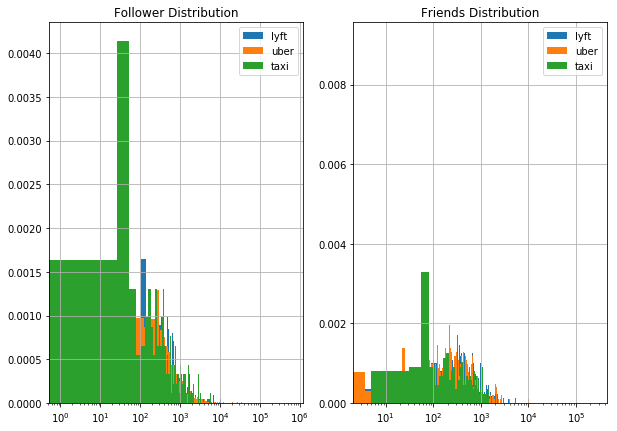

In [181]:
fig,axs=plt.subplots(1,2,figsize=(10,7))
bins=10000
df_lyft['followers'].hist(ax=axs[0],bins=bins,density=1,label='lyft')
df_uber['followers'].hist(ax=axs[0],bins=bins,density=1,label='uber')
df_taxi['followers'].hist(ax=axs[0],bins=bins,density=1,label='taxi')
df_lyft['friends'].hist(ax=axs[1],bins=bins,density=1,label='lyft')
df_uber['friends'].hist(ax=axs[1],bins=bins,density=1,label='uber')
df_taxi['friends'].hist(ax=axs[1],bins=bins,density=1,label='taxi')
axs[0].set_title('Follower Distribution')
axs[0].set_xscale('log')
axs[1].set_title('Friends Distribution')
axs[1].set_xscale('log')
axs[0].legend()
axs[1].legend()
plt.show()

In [131]:
df_poi=df1[(df1['word_check']=='lyft')|(df1['word_check']=='uber')|(df1['word_check']=='lyftuber')|
           (df1['word_check']=='taxi')|(df1['word_check']=='lyfttaxi')|(df1['word_check']=='lyftubertaxi')|
          (df1['word_check']=='ubertaxi')]

In [182]:
poi_uIDS=df_poi['uID'].unique()

In [183]:
len(df_poi['uID'].unique())

3365

In [185]:
df_di=df1[df1['uID'].isin(poi_uIDS)]

In [186]:
len(df_di)

105151

In [187]:
df_ndi=df1[~df1['uID'].isin(poi_uIDS)]

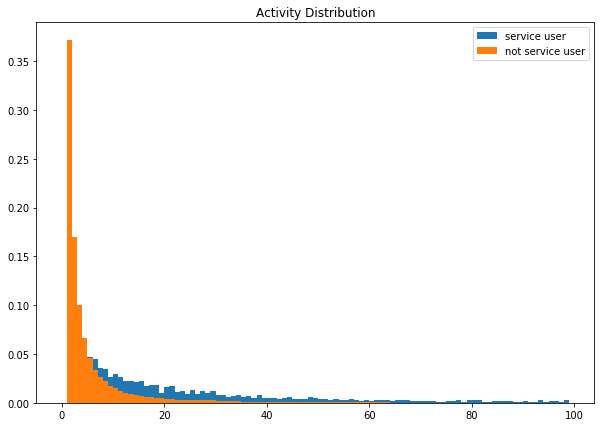

In [200]:
fig,ax=plt.subplots(figsize=(10,7))
bins=np.arange(0, 100, 1)
di=df_di['uID'].value_counts().values
ndi=df_ndi['uID'].value_counts().values
ax.hist(di, bins=bins,density=1,label='service user')
ax.hist(ndi, bins=bins,density=1,label='not service user')
ax.set_title('Activity Distribution')
ax.legend()
plt.show()

# Preparing data for model

In [279]:
df_test=df1[(df1['time']>pd.to_datetime("2019-10-31",utc=True)) & (df1['time']<pd.to_datetime("2019-11-2",utc=True))]

In [280]:
df1['word_check'].value_counts()

other           5013089
uber               2811
lyft                630
taxi                345
lyftuber            169
ubertaxi             22
lyftubertaxi         11
lyfttaxi              2
Name: word_check, dtype: int64

In [281]:
service_users=df_test[df_test['word_check'].isin([ 'uber', 'lyftuber', 'lyft', 'taxi', 'lyfttaxi',
       'lyftubertaxi', 'ubertaxi'])]['uID'].unique()

In [282]:
service_df=df_test[df_test['word_check'].isin([ 'uber', 'lyftuber', 'lyft', 'taxi', 'lyfttaxi',
       'lyftubertaxi', 'ubertaxi'])]

In [285]:
len(service_df['uID'].unique())
service_df.head()

,tID,uID,time,lat,lon,friends,followers,verified,favourites,text,cln_txt,word_check
1755662,1189693753692262400,756272677,2019-10-31 00:01:08+00:00,20.944986,-101.939182,175,67,False,460,@japonton @Pizu Lo que el joven quizo decir es...,japonton pizu lo que el joven quizo decir es a...,uber
1757040,1189694005103267842,193553275,2019-10-31 00:02:08+00:00,29.838495,-95.446486,995,2119,False,16162,I will Uber you,uber,uber
1757144,1189694021972746245,338564807,2019-10-31 00:02:12+00:00,25.748093,-80.303871,521,274,False,37430,Lmao this uber is ignoring the GPS to take a l...,lmao uber ignoring gps take longer routethis d...,uber
1757304,1189694051534155777,116600278,2019-10-31 00:02:19+00:00,19.626005,-99.090304,1102,165,False,67,@AutosyMas Uber trae mejores autos y más barat...,autosymas uber trae mejores autos ms barato su...,uber
1757905,1189694160296644608,56389220,2019-10-31 00:02:45+00:00,43.418190,-79.645081,2288,1303,False,20999,@mattgallowaycbc Uber Gourd 🎃,mattgallowaycbc uber gourd,uber


In [286]:
len(service_users)

1749

In [255]:
df_test['word_check'].value_counts()

other           1752710
uber                954
lyft                191
taxi                113
lyftuber             92
ubertaxi             13
lyftubertaxi          8
lyfttaxi              2
Name: word_check, dtype: int64

In [287]:
non_users=df_test[df_test['word_check']=='other']['uID'].unique()
import random
non_service_users=[random.choice(non_users) for i in range(200)]

In [288]:
model_users=list(service_users)+non_service_users
len(model_users)

1949

In [218]:
df1_sorted=df1.sort_values(by='time')

In [221]:
df_train=df1[(df1['time']<pd.to_datetime("2019-10-31",utc=True))].sort_values(by='time')

In [289]:
texts=[]
statuses=[]
for user in model_users:
    text=" ".join(df_train[df_train['uID']==user]['cln_txt'])
    texts.append(text)
    if text!='':
        #status.append(list(df_train[df_train['uID']==user]['word_check'])[0])
        temp_df=service_df[service_df['uID']==user]
        check_here=list(temp_df['word_check'])
        #print(check_here)
        if 'lyftubertaxi' in check_here:
            status='lyftubertaxi'
        elif 'lyftuber' in check_here:
            status='lyftuber'
        elif 'lyftaxi' in check_here:
            status='lyfttaxi'   
        elif 'ubertaxi' in check_here:
            status='ubertaxi'
        elif 'lyft' in check_here:
            status='lyft'
        elif 'uber' in check_here:
            status='uber'
        elif 'taxi' in check_here:
            status='taxi'
        else:
            status='other'
    else: 
        status='notfound'
    statuses.append(status)

['uber']
['uber']
['uber']
['uber']
['uber']
['uber']
['uber']
['uber', 'uber', 'uber']
['uber']
['uber']
['taxi']
['uber']
['uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'lyft', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber', 'uber']
['uber']
['uber']
['uber']
['lyftuber']
['lyftuber']
['lyft', 'lyft']
['uber', 'uber']
['uber']
['uber']
['taxi']
['uber']
['lyft', 'lyft']
['uber']
['taxi']
['lyft']
['uber']
['taxi']
['uber']
['uber']
['uber']
['uber']
['uber']
['uber']
['lyft', 'lyft', 'uber']
['uber']
['taxi']
['lyft']
['uber']
['lyft']
['uber']
['uber']
['uber']
['uber']
['taxi']
['lyft']
['lyft']
['lyft']
['uber']
['lyftuber']
['taxi', 'taxi']
['uber', 'uber']
['uber']
['uber']
['uber']
['uber']
['

In [265]:
'other' in list(temp_df['word_check'])

True

In [290]:
model_data=pd.DataFrame()
model_data['user']=model_users
model_data['texts']=texts
model_data['status']=statuses
print(len(model_data))
model_data['status'].value_counts()

1949


uber            897
notfound        554
lyft            225
taxi            122
other           102
lyftuber         40
ubertaxi          7
lyftubertaxi      2
Name: status, dtype: int64

In [291]:
model_data=model_data[model_data['texts']!='']
print(len(model_data))
model_data['status'].value_counts()

1395


uber            897
lyft            225
taxi            122
other           102
lyftuber         40
ubertaxi          7
lyftubertaxi      2
Name: status, dtype: int64

In [292]:
model_data=model_data[model_data['texts']!='']
len(model_data)

1395

# Training the user embedding model

In [293]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [294]:
tagged_data = [TaggedDocument(words=word_tokenize(row['texts']), tags=[str(row['user'])]) for index, row in model_data.iterrows()]

In [295]:
tagged_data

[TaggedDocument(words=['vampipe', 'tonces', 'guasn', 'drdelnorte', 'beatles', 'rule', 'que', 'queran', 'bad', 'bunny', 'eso', 'lo', 'pone', 'el', 'afanador', 'del', 'qx', 'glodejo', 'si', 'seor', 'la', 'va'], tags=['756272677']),
 TaggedDocument(words=['scraccbaby', 'sold', 'chief', 'scraccbaby', 'gaaaadamn', 'bro', 'atleast', 'come', 'funeral', 'say', 'want', 'facetime', 'mean', 'put', 'pussy', 'face', 'got', 'astros', 'win', 'dont', 'wan', 'na', 'lay', 'rain', 'sumn', 'wrong', 'witcha', 'yall', 'know', 'weather', 'uber', 'drivers', 'know', 'citygt', 'itsboujettaa', 'use', 'stinger', 'detox', 'thenicene', 'lmao', 'like', 'magic', 'school', 'bus', 'get', 'bad', 'bitch', 'gon', 'insecure', 'plzxcusemyhand', 'im', 'pretty', 'sure', 'chinese', 'kids', 'made', 'em', 'got', 'nerve', 'still', 'sensor', 'ls', 'took', 'lessons', 'fresh', 'shower', 'smelling', 'like', 'bath', 'amp', 'body', 'works', 'kanye', 'west', 'need', 'back', 'new', 'episodes', 'criminal', 'minds', 'gt', 'bitch', 'im', 'w

In [328]:
max_epochs = 100
vec_size = 200
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved


In [329]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)

C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


V1_infer [-6.56985864e-02 -7.51740718e-03  1.48103712e-02  1.54750645e-01
  1.23415269e-01 -8.03683698e-02 -6.15704805e-02 -1.60214826e-02
  9.69634671e-03  7.56930336e-02  3.17813680e-02  4.21635546e-02
 -7.04786703e-02 -3.66066583e-02 -9.36967954e-02 -3.16387475e-01
  2.76319659e-03  4.07670699e-02 -3.75176072e-02  5.86704314e-02
 -8.96977484e-02 -1.39172897e-01  2.55793426e-02 -1.32457428e-02
 -1.71482652e-01  1.22724809e-02 -5.29643008e-03  1.37534353e-03
 -2.59665586e-02  3.31363678e-02 -3.76229398e-02  1.91638321e-02
  6.65172609e-03  3.22966129e-02 -3.43576539e-04  1.02642909e-01
  8.73145312e-02 -3.16063920e-03 -1.59588009e-01 -6.98644668e-03
 -5.02027050e-02 -1.86307710e-02  1.23882748e-01 -1.50001897e-02
  5.81408292e-02 -9.97324660e-03 -6.33116215e-02 -1.43906291e-04
 -1.32526591e-01  9.65067893e-02  9.61256176e-02 -4.69084755e-02
 -5.25693856e-02 -1.58330709e-01  1.20308191e-01 -1.67698562e-02
 -1.16986334e-01  1.21964440e-01 -1.00724325e-02  2.68633757e-02
 -7.52168745e-02

# test similarities

In [330]:
## between service user
service_similarites=[]

for user1 in list(model_data[~model_data['status'].isin(['other'])]['user']):
    for user2 in list(model_data[~model_data['status'].isin(['other'])]['user']):
        if user1!=user2:
            service_similarites.append(model.docvecs.distance(str(user1),str(user2)))

In [331]:
non_service_similarites=[]

for user1 in list(model_data[~model_data['status'].isin(['uber'])]['user']):
    for user2 in list(model_data[model_data['status'].isin(['other'])]['user']):
        if user1!=user2:
            non_service_similarites.append(model.docvecs.distance(str(user1),str(user2)))

In [332]:
max(non_service_similarites)

1.023300174161848

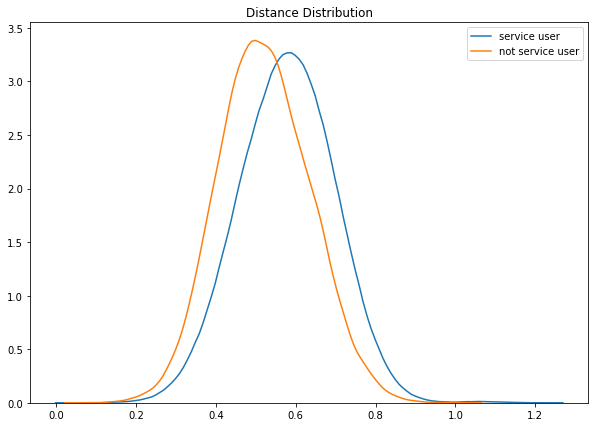

In [333]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,7))
sns.distplot(service_similarites, hist=False,ax=ax,label='service user')
sns.distplot(non_service_similarites, hist=False,ax=ax,label='not service user')
ax.set_title('Distance Distribution')
ax.legend()
plt.show()

# prediction model

In [334]:
features=[]
output=[]
for index, row in model_data.iterrows():
    features.append(list(model.docvecs[str(row['user'])]))
    output.append(row['status'])

In [335]:
np.array(features).shape

(1395, 200)

In [336]:
output

['uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'taxi',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'lyftuber',
 'lyftuber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'taxi',
 'uber',
 'lyft',
 'uber',
 'taxi',
 'lyft',
 'uber',
 'taxi',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'lyft',
 'uber',
 'taxi',
 'lyft',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'uber',
 'taxi',
 'lyft',
 'lyft',
 'lyft',
 'uber',
 'lyftuber',
 'taxi',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'lyftubertaxi',
 'taxi',
 'uber',
 'taxi',
 'uber',
 'uber',
 'uber',
 'lyft',
 'uber',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'uber',
 'lyftuber',
 'lyft',
 'ubertaxi',
 'uber',
 'taxi',
 'lyft',
 'uber',
 'uber',
 'uber',
 'lyft',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'taxi',
 'lyft',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'lyft',


In [354]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import re
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
import matplotlib
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [396]:
X = features
y=output
#y = lb.fit_transform(output)

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [397]:
np.array(X).shape

(1395, 200)

In [398]:
y

['uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'taxi',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'lyftuber',
 'lyftuber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'taxi',
 'uber',
 'lyft',
 'uber',
 'taxi',
 'lyft',
 'uber',
 'taxi',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'lyft',
 'uber',
 'taxi',
 'lyft',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'uber',
 'taxi',
 'lyft',
 'lyft',
 'lyft',
 'uber',
 'lyftuber',
 'taxi',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'lyftubertaxi',
 'taxi',
 'uber',
 'taxi',
 'uber',
 'uber',
 'uber',
 'lyft',
 'uber',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'uber',
 'lyftuber',
 'lyft',
 'ubertaxi',
 'uber',
 'taxi',
 'lyft',
 'uber',
 'uber',
 'uber',
 'lyft',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'taxi',
 'lyft',
 'uber',
 'lyft',
 'uber',
 'uber',
 'uber',
 'uber',
 'uber',
 'lyft',


In [399]:
#Oversample the training set
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [408]:
#Define Scoring
scoring = {'Accuracy': make_scorer(accuracy_score)}

classifier=RandomForestClassifier()#n_estimators=500,max_depth=500,max_features=10)
param_grid={'max_depth':[5,50,500],
            'n_estimators':[1, 5, 15, 50, 200],
            'max_features':[10,100,200]} 

    
gs = GridSearchCV(classifier,
                  param_grid=param_grid,
                  scoring=scoring, cv=5, refit='Accuracy', return_train_score=True,verbose=True)



gs.fit(X_resampled,  y_resampled)
results = gs.cv_results_


y_pred=gs.predict(X_test)#.todense()

acc=accuracy_score(y_test,y_pred)
print('Accuracy : ', round(acc,3))
cr=classification_report(y_test,y_pred)
print(cr)
cm=confusion_matrix(y_test,y_pred)
print(cm)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 15.4min finished


Accuracy :  0.647


C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\envs\PIP_35\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        lyft       1.00      0.01      0.03        69
    lyftuber       0.00      0.00      0.00         9
       other       0.00      0.00      0.00        34
        taxi       0.00      0.00      0.00        36
        uber       0.65      1.00      0.78       270
    ubertaxi       0.00      0.00      0.00         1

   micro avg       0.65      0.65      0.65       419
   macro avg       0.27      0.17      0.14       419
weighted avg       0.58      0.65      0.51       419

[[  1   0   0   0  68   0]
 [  0   0   0   0   9   0]
 [  0   0   0   0  34   0]
 [  0   0   0   0  36   0]
 [  0   0   0   0 270   0]
 [  0   0   0   0   1   0]]


In [407]:
gs.estimator.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [410]:
len(df1)

5017079